# 2019 UTSW Salary Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
data = pd.read_excel('TPIA_Data_2019.xlsx')

In [6]:
data.head()

,Primary Name,Department Description,Job Code Description,Full Time Type Description,Gender,Date First Hire,Race American Indian Flag,Race Asian Flag,Race Pacific Islander Flag,Race African American Flag,Race White Flag,Standard Hours,Annual Pay
0,"Akorede,Simbiat",10 North- Med/Surg,PATIENT CARE TECHNICIAN,PRN,Female,2018-03-19,N,N,N,Y,N,19.6,15288
1,"Bosire,Rebecca Kerubo",10 North- Med/Surg,PATIENT CARE TECHNICIAN,PRN,Female,2017-08-07,N,N,N,Y,N,19.6,15288
2,"Dasse,Tamar Hyppolite",10 North- Med/Surg,PATIENT CARE TECHNICIAN,PRN,Female,2018-05-21,N,N,N,N,N,19.6,15288
3,"Harris-Brunson,Sidney",10 North- Med/Surg,PATIENT CARE TECHNICIAN,PRN,Female,2018-06-04,N,N,N,Y,N,19.6,15288
4,"Macalalad,Kristine (Kristine",10 North- Med/Surg,PATIENT CARE TECHNICIAN,PRN,Female,2019-07-15,N,Y,N,N,N,19.6,15288


Full-Time    15223
Part-Time     1910
PRN            832
WIP             54
Name: Full Time Type Description, dtype: int64


([<matplotlib.patches.Wedge at 0x12cd764d0>,
 [Text(-0.9718678899796034, 0.5152405306520381, 'Full-Time'),
  Text(0.8810209390593774, -0.6586365499567519, 'Part-Time'),
  Text(1.0852604381239566, -0.17947083730511146, 'PRN'),
  Text(1.0999512485994467, -0.010356191603020705, 'WIP')])

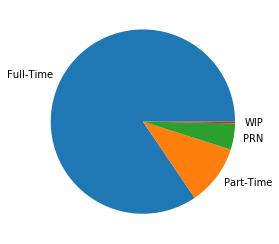

In [27]:
# Let's see how distrubution of full time vs part time looks
f1 = data['Full Time Type Description'].value_counts()
print(f1)

p_full = plt.figure()
pf1 = p_full.add_axes([0.1,0.1,0.8,0.8])
pf1.pie(f1.values.tolist(), labels=f1.index.values.tolist())

Female    12054
Male       5965
Name: Gender, dtype: int64


([<matplotlib.patches.Wedge at 0x12cce4490>,
 [Text(-0.5568507853635755, 0.9486396591119144, 'Female'),
  Text(0.5568508741816278, -0.9486396069757772, 'Male')])

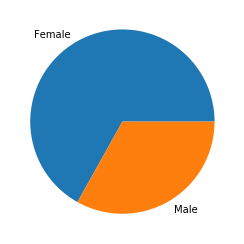

In [26]:
# Gender distribution
g1 = data['Gender'].value_counts()
print(g1)

p_gender = plt.figure()
ax1 = p_gender.add_axes([0.1,0.1,0.8,0.8])
ax1.pie(g1.values.tolist(), labels=g1.index.values.tolist())


In [31]:
data[data['Primary Name'].apply(lambda x: x.lower().find('maruni') >= 0)]

,Primary Name,Department Description,Job Code Description,Full Time Type Description,Gender,Date First Hire,Race American Indian Flag,Race Asian Flag,Race Pacific Islander Flag,Race African American Flag,Race White Flag,Standard Hours,Annual Pay
14565,"Maruni,Shaquitha Tiana",Respiratory Therapy,REG RESP THERAPIST,Part-Time,Female,2015-11-02,N,N,N,Y,N,36.0,56534


In [34]:
# Respiratory department job codes
data[data['Department Description'] == 'Respiratory Therapy']['Job Code Description'].value_counts()

REG RESP THERAPIST                139
ASSIST MGR RESP THRPY STF COOR      7
CERT RESP THERAPIST                 5
MGR RESP THERAPY                    1
Name: Job Code Description, dtype: int64

In [36]:
data[data['Department Description'] == 'Respiratory Therapy']['Gender'].value_counts()

Female    90
Male      62
Name: Gender, dtype: int64

In [43]:
data[data['Department Description'] == 'Respiratory Therapy'][['Gender', 'Annual Pay']].groupby('Gender').describe()

Annual Pay                                                         \
            count          mean           std      min      25%      50%   
Gender                                                                     
Female       90.0  53116.355556  19125.543895  27834.0  30576.0  53379.5   
Male         62.0  53634.467742  16995.917840  27253.0  30576.0  54465.0   

                            
             75%       max  
Gender                      
Female  69839.00  118809.0  
Male    69928.25   89585.0

In [46]:
data[['Department Description', 'Annual Pay']].groupby('Department Description').describe()

Annual Pay                                         \
                               count           mean           std       min   
Department Description                                                        
10 North- Med/Surg              78.0   54890.051282  27505.973939   15288.0   
10 South CV Surg/Thoracic       73.0   60496.794521  25769.466343   24336.0   
11  South BMT and Hem/Onc       67.0   65941.552239  27323.471131   15288.0   
11 North - Oncology             60.0   63360.416667  29777.644018   15288.0   
12 North - Med/Surg             70.0   59949.500000  31471.645911   12230.0   
...                              ...            ...           ...       ...   
Warehouse                        2.0   37002.000000    108.894444   36925.0   
Warehouse-Zale                  52.0   39484.403846  14612.960919   14560.0   
Willed Body Program Admin       32.0   26639.750000  19096.595267   11211.0   
Wound Ostomy Nursing-CUH         9.0   82945.666667  32780.253038   40768.0   
Wound Ostomy Nursing-Zale        1.0  106080.000000           NaN  106080.0   

                                                                     
                                 25%       50%        75%       max  
Department Description                                               
10 North- Med/Surg          33898.75   53368.5   71266.00  108326.0  
10 South CV Surg/Thoracic   37710.00   60278.0   70761.00  131081.0  
11  South BMT and Hem/Onc   47184.50   61859.0   89866.00  133348.0  
11 North - Oncology         37558.25   63044.5   85488.00  129000.0  
12 North - Med/Surg         36288.25   58905.0   84832.75  133348.0  
...                              ...       ...        ...       ...  
Warehouse                   36963.50   37002.0   37040.50   37079.0  
Warehouse-Zale              30877.50   34766.5   42411.00   97884.0  
Willed Body Program Admin   11262.00   19065.5   39436.00   94500.0  
Wound Ostomy Nursing-CUH    40768.00  100464.0  106080.00  117395.0  
Wound Ostomy Nursing-Zale  106080.00  106080.0  106080.00  106080.0  

[1065 rows x 8 columns]

In [48]:
data[['Department Description', 'Gender' , 'Annual Pay']].groupby(['Department Description', 'Gender']).describe()

Annual Pay                               \
                                      count           mean           std   
Department Description    Gender                                           
10 North- Med/Surg        Female       73.0   54380.835616  27747.191835   
                          Male          5.0   62324.600000  25139.519283   
10 South CV Surg/Thoracic Female       67.0   58901.432836  25639.297597   
                          Male          6.0   78311.666667  21685.511815   
11  South BMT and Hem/Onc Female       60.0   64826.666667  26903.489407   
...                                     ...            ...           ...   
Warehouse-Zale            Male         34.0   41500.500000  17282.991841   
Willed Body Program Admin Female       24.0   24751.125000  14804.151363   
                          Male          8.0   32305.625000  29085.855688   
Wound Ostomy Nursing-CUH  Female        9.0   82945.666667  32780.253038   
Wound Ostomy Nursing-Zale Female        1.0  106080.000000           NaN   

                                                                            \
                                       min        25%       50%        75%   
Department Description    Gender                                             
10 North- Med/Surg        Female   15288.0   32254.00   53248.0   67600.00   
                          Male     37710.0   37710.00   60340.0   87276.00   
10 South CV Surg/Thoracic Female   24336.0   37710.00   59696.0   68941.00   
                          Male     59633.0   60413.50   70543.0   97832.50   
11  South BMT and Hem/Onc Female   15288.0   49768.75   61786.0   78109.00   
...                                    ...        ...       ...        ...   
Warehouse-Zale            Male     14560.0   31049.00   35796.0   46940.25   
Willed Body Program Admin Female   11211.0   11262.00   19065.5   38473.25   
                          Male     11211.0   11262.00   20615.0   43253.00   
Wound Ostomy Nursing-CUH  Female   40768.0   40768.00  100464.0  106080.00   
Wound Ostomy Nursing-Zale Female  106080.0  106080.00  106080.0  106080.00   

                                            
                                       max  
Department Description    Gender            
10 North- Med/Surg        Female  108326.0  
                          Male     88587.0  
10 South CV Surg/Thoracic Female  131081.0  
                          Male    105185.0  
11  South BMT and Hem/Onc Female  133348.0  
...                                    ...  
Warehouse-Zale            Male     97884.0  
Willed Body Program Admin Female   50862.0  
                          Male     94500.0  
Wound Ostomy Nursing-CUH  Female  117395.0  
Wound Ostomy Nursing-Zale Female  106080.0  

[1854 rows x 8 columns]

In [49]:
data[[ 'Gender' , 'Annual Pay']].groupby(['Gender']).describe()

Annual Pay                                                       \
            count           mean            std  min      25%      50%   
Gender                                                                   
Female    12054.0   73485.461507   55962.328151  0.0  39520.0  58022.0   
Male       5965.0  104558.588097  110092.187671  0.0  42216.0  64493.0   

                             
             75%        max  
Gender                       
Female   86980.0   750000.0  
Male    113318.0  1350000.0